In [4]:
# imports

import sys
sys.path.append('../core/')
import gmm as GMM
import jd as JD

import importlib
importlib.reload(GMM)
importlib.reload(JD)

import numpy as np
from multiprocessing import Pool

In [5]:
# load data (feature space - 42423 cells, 15 features)
C = np.load('proj.npy')

In [6]:
# build 10 gmms, k from 7 to 11 twice
q, scores = GMM.build_repeat(C, range_=np.arange(7,12), nreps=2, ncores=3)

In [7]:
# use umap on the feature data and the GMMs means
import matplotlib
import umap
from matplotlib import pyplot as plt

X = [C]+[q[i].means_ for i in range(len(q))]
X = np.vstack(X)
embedding = umap.UMAP().fit_transform(X)

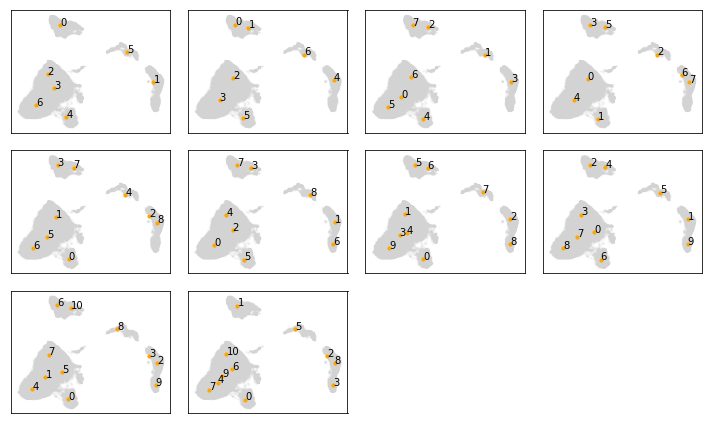

In [8]:
m, n = C.shape
emb_C = embedding[:m,:]

start=m
end=m

plt.rcParams['figure.figsize'] = [10, 6]

for i, gmm in enumerate(q):
    n = gmm.n_components
    end += n
    means = embedding[start:end,:]
    start = end
    
    plt.subplot(3,4,i+1)
    plt.scatter(emb_C[:,0],
            emb_C[:,1],
            s=1,
            c='lightgrey',
            alpha=0.1)
    plt.scatter(means[:,0],
            means[:,1],
            s=10,
            c='orange',
            alpha=1)
    for ii, coords in enumerate(means):
        plt.text(coords[0], coords[1], '%d' % ii)    
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [9]:
# align components of each model to a reference model (arbitrarily the first one)
ref = q[0]
with Pool(None) as p:
    alignments = p.starmap(JD.align_components, [(q[i], ref) for i in range(1,len(q))])

In [10]:
alignments

[array([[ 0.        ,  2.        ,  0.64774478],
        [ 1.        ,  0.        ,  0.46118075],
        [ 2.        ,  3.        ,  0.06545719],
        [ 3.        ,  6.        , -0.19295472],
        [ 4.        ,  1.        ,  0.47709897],
        [ 5.        ,  4.        ,  0.35228609],
        [ 6.        ,  5.        ,  1.09103137]]),
 array([[0.        , 3.        , 0.10312125],
        [1.        , 1.        , 1.36169399],
        [2.        , 0.        , 0.92256542],
        [3.        , 1.        , 0.50866235],
        [4.        , 4.        , 0.51527419],
        [5.        , 6.        , 0.11272668],
        [6.        , 3.        , 0.30233676],
        [7.        , 0.        , 0.57548839]]),
 array([[ 0.00000000e+00,  3.00000000e+00, -1.88251346e-03],
        [ 1.00000000e+00,  4.00000000e+00,  3.62091047e-01],
        [ 2.00000000e+00,  5.00000000e+00,  1.39373322e+00],
        [ 3.00000000e+00,  0.00000000e+00,  6.41070009e-01],
        [ 4.00000000e+00,  6.00000000e+00